TITANIC

https://www.kaggle.com/competitions/titanic/overview

```
survival	Survival		0 = No, 1 = Yes
pclass		Ticket class		1 = 1st, 2 = 2nd, 3 = 3rd
sex		Sex	
Age		Age in years	
sibsp		# of siblings / spouses aboard the Titanic	
parch		# of parents / children aboard the Titanic	
ticket		Ticket number	
fare		Passenger fare	
cabin		Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
```

데이터 분석을 잘하는사람

데이터 도메인

인사이트능력

In [553]:
import numpy as np
import pandas as pd

# 데이터 가져오기

In [570]:
train = pd.read_csv('./train.csv')
#train.head(10)
train.info()
# train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [571]:
train.columns = train.columns.str.lower()
train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

# 결측치 확인

In [4]:
train.isna().sum()[train.isna().sum()>0].sort_values(ascending=False)

cabin       687
age         177
embarked      2
dtype: int64

# 중복값 확인

In [5]:
# distinct
train['sex'].unique()

array(['male', 'female'], dtype=object)

In [6]:
train['sex'].nunique()

2

In [7]:
train['age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [8]:
len(train['age'].unique())
train['age'].nunique() # 널값은 빼는듯?

88

In [9]:
train.nunique()

passengerid    891
survived         2
pclass           3
name           891
sex              2
age             88
sibsp            7
parch            7
ticket         681
fare           248
cabin          147
embarked         3
dtype: int64

# 한번에 출력
```
col        cnt         nan_cnt         nan_rate

ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
컬럼명
```

In [10]:
col = train.columns
col

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [11]:
nan_cnt = train.isna().sum().values
nan_cnt

array([  0,   0,   0,   0,   0, 177,   0,   0,   0,   0, 687,   2],
      dtype=int64)

In [12]:
cnt = train.count().values
cnt

array([891, 891, 891, 891, 891, 714, 891, 891, 891, 891, 204, 889],
      dtype=int64)

In [13]:
nan_rate = nan_cnt/train.shape[0]*100
nan_rate

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       19.86531987,  0.        ,  0.        ,  0.        ,  0.        ,
       77.1043771 ,  0.22446689])

In [14]:
unique_cnt = train.nunique().values
unique_cnt

array([891,   2,   3, 891,   2,  88,   7,   7, 681, 248, 147,   3],
      dtype=int64)

In [15]:
res = pd.DataFrame({'cnt':cnt, 'unique_cnt':unique_cnt, 'nan_cnt':nan_cnt}, index=col)
# res['cnt'] = cnt
# res['unique_cnt'] = unique_cnt
# res['nan_cnt'] = nan_cnt
res['nan_rate'] = list(map(lambda x:str(x)+'%', nan_rate.round(2)))
res.sort_values('nan_rate', ascending=False).T

,cabin,age,embarked,passengerid,survived,pclass,name,sex,sibsp,parch,ticket,fare
cnt,204,714,889,891,891,891,891,891,891,891,891,891
unique_cnt,147,88,3,891,2,3,891,2,7,7,681,248
nan_cnt,687,177,2,0,0,0,0,0,0,0,0,0
nan_rate,77.1%,19.87%,0.22%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%


# EDA

탐색적 데이터 분석

시각화

In [16]:
#! pip install matplotlib

In [559]:
import matplotlib.pyplot as plt

## passengerid

### 삭제 분석에 필요없는 컬럼

In [572]:
train = train.drop(['passengerid'], axis=1)
train.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## survived

In [573]:
train['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

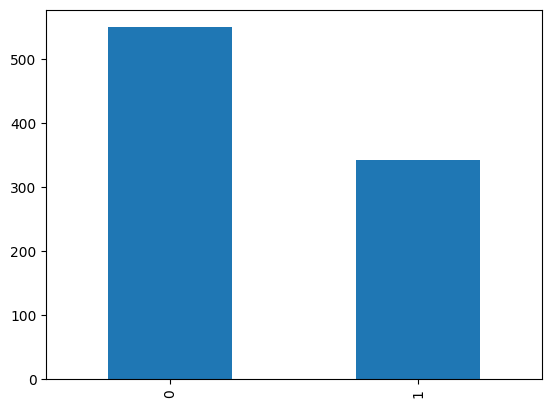

In [20]:
train['survived'].value_counts().plot(kind='bar')
plt.show()

## pclass

In [21]:
train['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

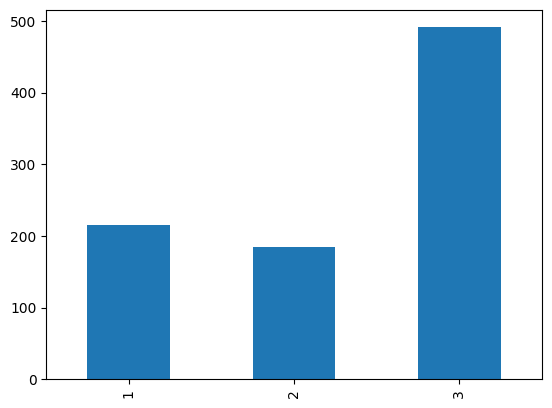

In [202]:
train['pclass'].value_counts().sort_index().plot(kind='bar')
plt.show()

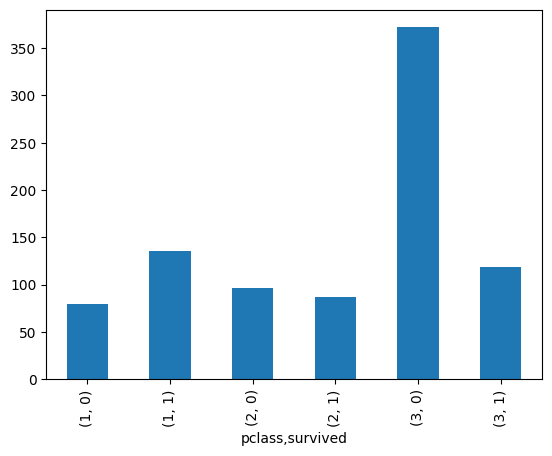

In [23]:
train[['pclass','survived']].value_counts().sort_index().plot(kind='bar')
plt.show()

## cabin

In [579]:
train[train['cabin'].notna()==True].shape

(204, 11)

### 앞글자만 따기

In [592]:
traincp = train[train['cabin'].notna()==True]
traincp['cabin_str'] = traincp['cabin'].str[0]
traincp.head()

C:\Users\ASIA\AppData\Local\Temp\ipykernel_2680\11000455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traincp['cabin_str'] = traincp['cabin'].str[0]


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin_str
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,E
10,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,G
11,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,C


In [593]:
traincp[['cabin_str','survived']].value_counts().sort_index()

cabin_str  survived
A          0            8
           1            7
B          0           12
           1           35
C          0           24
           1           35
D          0            8
           1           25
E          0            8
           1           24
F          0            5
           1            8
G          0            2
           1            2
T          0            1
dtype: int64

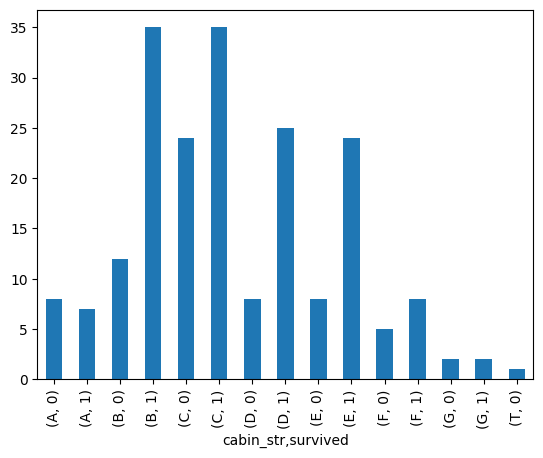

In [595]:
traincp[['cabin_str','survived']].value_counts().sort_index().plot(kind='bar')
plt.show()

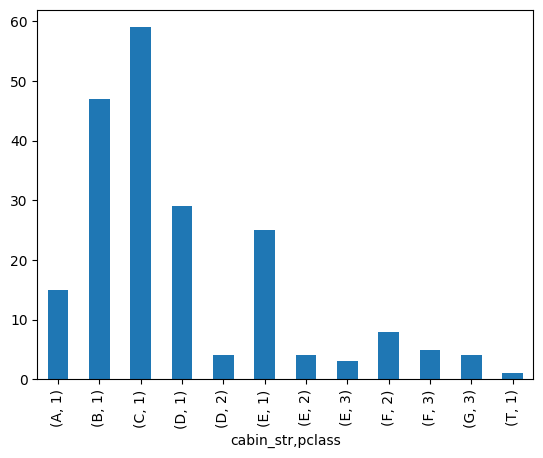

In [596]:
traincp[['cabin_str','pclass']].value_counts().sort_index().plot(kind='bar')
plt.show()

### 컬럼 삭제

cabin의 의미는 분석가마다 다 다름

우리는 생존과 연관이 없다고 판단 삭제 고고

In [597]:
del traincp
train = train.drop(['cabin'], axis=1)
train.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## embarked

### 결측치 채우기
```
df.mode().values[0]
```
데이터를 삭제하는건 안됨

심사숙고하여 잘라야함

In [31]:
train['embarked'].isna().sum()

2

In [32]:
train[train['embarked'].isna()==True]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [33]:
embarked_mode_val = train['embarked'].mode().values[0]
embarked_mode_val

'S'

In [598]:
train['embarked'] = train['embarked'].fillna(embarked_mode_val)
train['embarked'].isna().sum()

0

In [599]:
train['embarked'].value_counts().sort_index()

C    168
Q     77
S    646
Name: embarked, dtype: int64

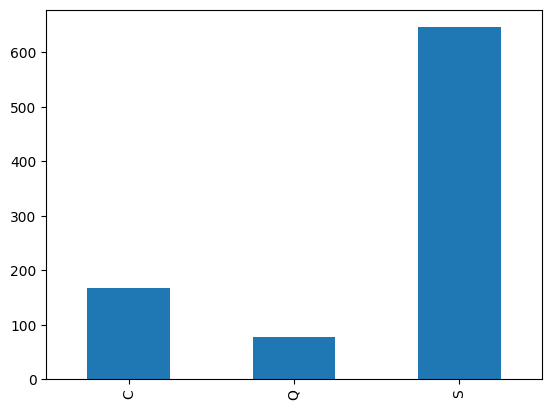

In [600]:
train['embarked'].value_counts().sort_index().plot(kind='bar')
plt.show()

In [601]:
train[['embarked','survived']].value_counts().sort_index()

embarked  survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           219
dtype: int64

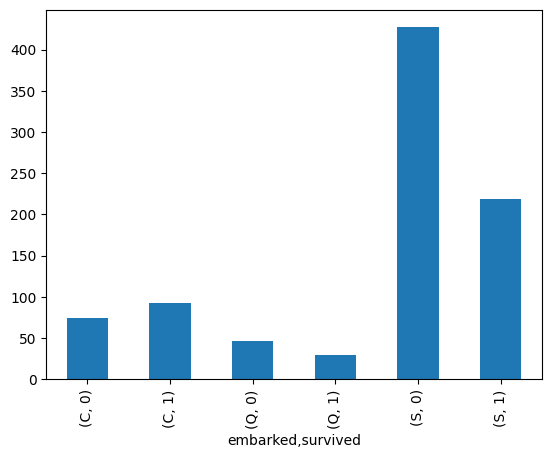

In [602]:
train[['embarked','survived']].value_counts().sort_index().plot(kind='bar')
plt.show()

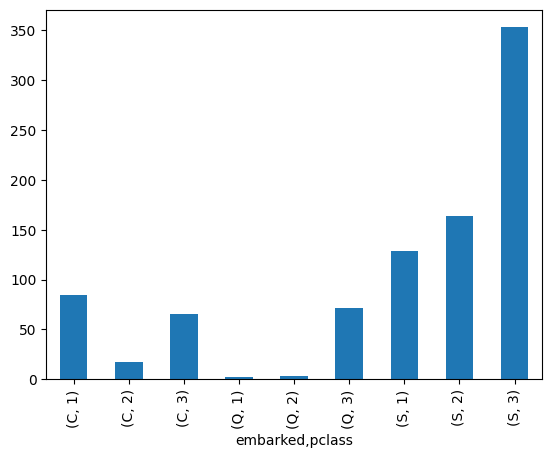

In [603]:
train[['embarked','pclass']].value_counts().sort_index().plot(kind='bar')
plt.show()

## name

### 정규표현식으로 떼오기
```
df['컬럼명'].str.extract('정규표현식')
```

In [608]:
exam = train.loc[30,'name']
exam

'Uruchurtu, Don. Manuel E'

In [610]:
import re
re.findall('\s(\w+)[.]\s', exam)

['Don']

In [613]:
train['name_title'] = train['name'].str.extract('\s(\w+)[.]\s')
train['name_title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [618]:
train['name_title'].value_counts().sort_index()

Capt          1
Col           2
Countess      1
Don           1
Dr            7
Jonkheer      1
Lady          1
Major         2
Master       40
Miss        182
Mlle          2
Mme           1
Mr          517
Mrs         125
Ms            1
Rev           6
Sir           1
Name: name_title, dtype: int64

In [614]:
train[['name_title','sex']].value_counts().sort_index()

name_title  sex   
Capt        male        1
Col         male        2
Countess    female      1
Don         male        1
Dr          female      1
            male        6
Jonkheer    male        1
Lady        female      1
Major       male        2
Master      male       40
Miss        female    182
Mlle        female      2
Mme         female      1
Mr          male      517
Mrs         female    125
Ms          female      1
Rev         male        6
Sir         male        1
dtype: int64

In [615]:
train[(train['name_title']=='Dr')&(train['sex']=='female')]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,name_title
796,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,S,Dr


### 값 변경 연습

자주쓰지않는 호칭 변경
```
df.replace('A','B')
df.map({'A':'B'})
df.applay(lambda)
df.loc[변경하고싶은데이터프레임] = 배열or인덱스or시리즈: dp.where 어쩌구
```

In [619]:
# replace()
traincp = train.copy()
traincp['sex'] = traincp['sex'].replace(['male','female'], [1,0])
traincp.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,name_title
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,Mr


In [620]:
# map
traincp['pclass'] = traincp['pclass'].map({1:11,2:22,3:33})
traincp.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,name_title
0,0,33,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1,11,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,Mrs
2,1,33,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1,11,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,Mrs
4,0,33,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,Mr


In [621]:
# 람다
traincp['sex'] = traincp['sex'].apply(lambda x: 'M' if x==1 else 'G')
traincp.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,name_title
0,0,33,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1,11,"Cumings, Mrs. John Bradley (Florence Briggs Th...",G,38.0,1,0,PC 17599,71.2833,C,Mrs
2,1,33,"Heikkinen, Miss. Laina",G,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1,11,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",G,35.0,1,0,113803,53.1000,S,Mrs
4,0,33,"Allen, Mr. William Henry",M,35.0,0,0,373450,8.0500,S,Mr


### 호칭 변경

자 그러면 바꿔보자

<pre>
Rev.   목사 --> Mr.
Don. 상대 남성의 존칭 --> Mr.
Jonkheer.  無작위귀족(Jonkheer)  --> Mr.
Major. 미군계급  --> Mr.
Col.   미군장교  --> Mr.
Capt.  선생님,공군 --> Mr.
Sir.      귀족남석 --> Mr.

Countess. 백작부인  --> Mrs.
Mme.  Madame  --> Mrs.

Mlle.  나이어린여아  --> Miss.
Ms.   결혼여부     --> Miss.
Lady. 나이어린여성 --> Miss.

In [622]:
to_Mr = ['Rev', 'Don', 'Jonkheer', 'Major', 'Col', 'Capt', 'Sir']
to_Mrs = ['Countess', 'Mme']
to_Miss = ['Mlle', 'Ms', 'Lady']
traincp['name_title'] = traincp['name_title'].replace(to_Mr, ['Mr']*len(to_Mr))
traincp['name_title'] = traincp['name_title'].replace(to_Mrs, ['Mrs']*len(to_Mrs))
traincp['name_title'] = traincp['name_title'].replace(to_Miss, ['Miss']*len(to_Miss))
traincp['name_title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Dr'], dtype=object)

In [623]:
train['name_title'] = traincp['name_title']
del traincp
train['name_title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Dr'], dtype=object)

### 이름컬럼 삭제

In [624]:
train = train.drop(['name'], axis=1)
train['name_title'].value_counts()

Mr        531
Miss      186
Mrs       127
Master     40
Dr          7
Name: name_title, dtype: int64

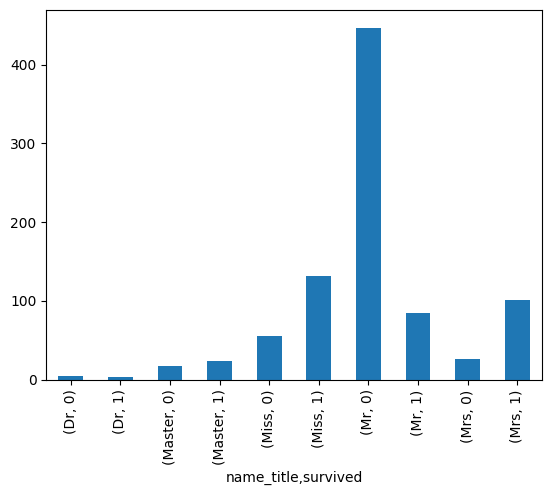

In [628]:
train[['name_title','survived']].value_counts().sort_index().plot(kind='bar')
plt.show()

## sex

In [629]:
train['sex'].unique()

array(['male', 'female'], dtype=object)

In [630]:
train['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [632]:
train[['sex','survived']].value_counts().sort_index()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

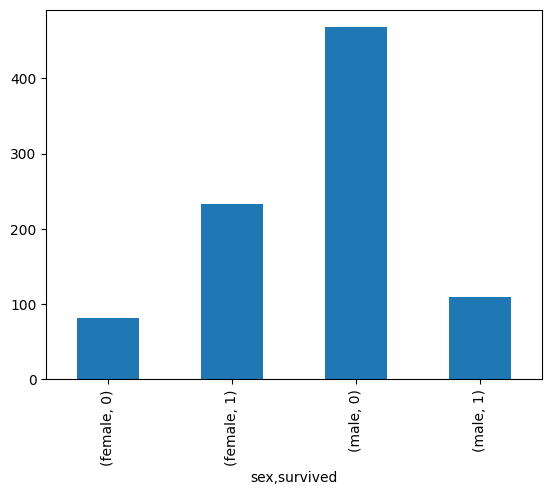

In [633]:
train[['sex','survived']].value_counts().sort_index().plot(kind='bar')
plt.show()

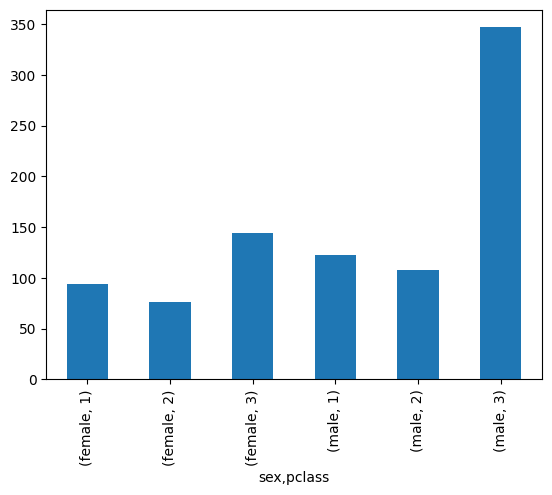

In [634]:
train[['sex','pclass']].value_counts().sort_index().plot(kind='bar')
plt.show()

## age

### 결측치 확인

In [635]:
train['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [636]:
train['age'].isna().sum()

177

In [637]:
train['age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [318]:
names_ageisna = train['name'][train['age'].isna()==True].values
names_ageisna.shape

(177,)

### 결측치 채우기

호칭의 평균나이로 채우기

In [638]:
# 호칭별 평균나이
train.groupby('name_title')['age'].mean()

name_title
Dr        42.000000
Master     4.574167
Miss      22.020000
Mr        32.891990
Mrs       35.763636
Name: age, dtype: float64

In [639]:
train.groupby('name_title')['age'].mean()['Dr']

42.0

In [640]:
train['age'][train['name_title']=='Dr'].mean()

42.0

In [360]:
(train['age'].isna()==True)

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: age, Length: 891, dtype: bool

In [361]:
(train['name_title']=='Dr')

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: name_title, Length: 891, dtype: bool

In [375]:
np.where((train['age'].isna()==True)&(train['name_title']=='Dr'),1,0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

다섯번 해야함 노가다 ㄴㄴㄴㄴ

### 결측치 채우기 일괄적용
https://steadiness-193.tistory.com/42
```
.apply()
.transform()
```

In [508]:
train.groupby('name_title')['age'].mean()

name_title
Dr        42.000000
Master     4.574167
Miss      22.020000
Mr        32.891990
Mrs       35.763636
Name: age, dtype: float64

In [676]:
traincp = train.copy()
mean_age_by_title = traincp.groupby('name_title')['age'].transform('mean')
mean_age_by_title

0      32.891990
1      35.763636
2      22.020000
3      35.763636
4      32.891990
         ...    
886    32.891990
887    22.020000
888    22.020000
889    32.891990
890    32.891990
Name: age, Length: 891, dtype: float64

In [677]:
# 호칭별 평균나이 시리즈로 뽑아서 결측값에 넣는방법
traincp['age2'] = traincp['age'].fillna(   mean_age_by_title   )
traincp['age2']

0      22.00
1      38.00
2      26.00
3      35.00
4      35.00
       ...  
886    27.00
887    19.00
888    22.02
889    26.00
890    32.00
Name: age2, Length: 891, dtype: float64

In [678]:
traincp.groupby('name_title')['age'].mean()

name_title
Dr        42.000000
Master     4.574167
Miss      22.020000
Mr        32.891990
Mrs       35.763636
Name: age, dtype: float64

In [679]:
# transform으로 일괄적용함수
traincp['age3'] = traincp.groupby('name_title')['age'].transform(lambda gdf:gdf.fillna(   gdf.mean()   ))
traincp['age3']

0      22.00
1      38.00
2      26.00
3      35.00
4      35.00
       ...  
886    27.00
887    19.00
888    22.02
889    26.00
890    32.00
Name: age3, Length: 891, dtype: float64

In [680]:
train['age'] = traincp['age3']
del traincp
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    object 
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   ticket      891 non-null    object 
 7   fare        891 non-null    float64
 8   embarked    891 non-null    object 
 9   name_title  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


### 나이를 구간화

In [681]:
train['age_group'] = (train['age']//10).astype('int')
train.head()

,survived,pclass,sex,age,sibsp,parch,ticket,fare,embarked,name_title,age_group
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr,2
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs,3
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,2
3,1,1,female,35.0,1,0,113803,53.1000,S,Mrs,3
4,0,3,male,35.0,0,0,373450,8.0500,S,Mr,3


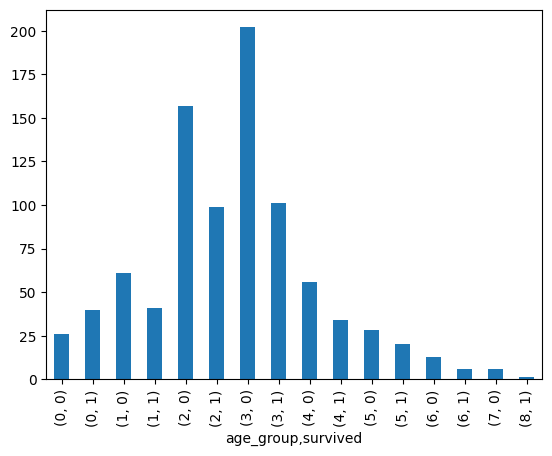

In [686]:
train[['age_group','survived']].value_counts().sort_index().plot(kind='bar')
plt.show()

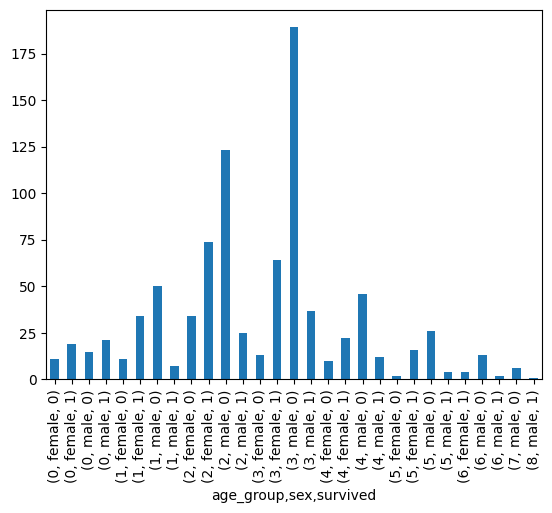

In [725]:
train[['age_group','sex','survived']].value_counts().sort_index().plot(kind='bar')
plt.show()

In [722]:
train.groupby('survived')[['age_group','sex']].value_counts()

survived  age_group  sex   
0         3          male      189
          2          male      123
          1          male       50
          4          male       46
          2          female     34
          5          male       26
          0          male       15
          3          female     13
          6          male       13
          0          female     11
          1          female     11
          4          female     10
          7          male        6
          5          female      2
1         2          female     74
          3          female     64
                     male       37
          1          female     34
          2          male       25
          4          female     22
          0          male       21
                     female     19
          5          female     16
          4          male       12
          1          male        7
          5          male        4
          6          female      4
                     male  